# `LOGISTIC REGRESSION - Breast Cancer Dataset`

### Assumptions of the Logistic Regression Model

#### 1. Linearity of the Logit
- The logistic regression model assumes a linear relationship between the logit (log-odds) of the outcome and the predictor variables.
- This can be expressed as:
$$ \text{logit}(P(Y=1)) = \log\left(\frac{P(Y=1)}{1-P(Y=1)}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_k X_k $$

#### 2. Independence of Observations
- The observations should be independent of each other.
- This implies that the outcome for one observation does not influence the outcome for another observation.

#### 3. No Multicollinearity
- The independent variables should not be highly correlated with each other.
- Perfect multicollinearity occurs when one independent variable is an exact linear function of one or more other independent variables, which violates this assumption.

#### 4. No Outliers
- There should be no influential outliers in the dataset that could disproportionately affect the results.
- Outliers in the independent variables or the residuals can distort the logistic regression model's results.

#### 5. Large Sample Size
- Logistic regression assumes a large enough sample size to provide reliable estimates of the coefficients.
- The larger the sample size, the more stable the estimates of the parameters will be.

#### 6. Independence of Errors
- The errors should be independent of each other.
- This means that the residuals (the difference between the observed and predicted outcomes) should not be correlated with each other.

#### 7. Binary or Dichotomous Dependent Variable
- Logistic regression is used when the dependent variable is binary or dichotomous, meaning it has only two possible outcomes (e.g., 0 and 1, yes and no, benign and malignant).

#### 8. Absence of Complete Separation
- Logistic regression requires that there is no perfect separation in the data. 
- Perfect separation occurs when one or more predictor variables can perfectly predict the outcome variable, leading to an inability to estimate the model's coefficients.

#### 9. Linearity in the Independent Variables
- The logit of the outcome is a linear combination of the independent variables.
- This means that the relationship between the independent variables and the logit transformation of the dependent variable should be linear.

##### <b> By ensuring these assumptions hold, the logistic regression model provides valid, reliable, and interpretable results for predicting the probability of binary outcomes. </b>


## Problem Definition: 

- Analysis of Breast Cancer Diagnosis using Logistic Regression. 

## Data:

- The Breast Cancer dataset is a widely used dataset provided by `sklearn` that contains data on breast cancer cases.
- It includes various features related to the characteristics of cell nuclei present in the image of a breast mass, along with the target variable, which indicates whether the cancer is benign or malignant.

### Dataset Description
The dataset consists of 569 samples and 30 features. Below is a detailed description of each feature:

1. `mean radius`: Mean of distances from the center to points on the perimeter.
2. `mean texture`: Standard deviation of gray-scale values.
3. `mean perimeter`: Mean size of the core tumor.
4. `mean area`: Mean area of the tumor.
5. `mean smoothness`: Mean local variation in radius lengths.
6. `mean compactness`: Mean of perimeter^2/area - 1.0.
7. `mean concavity`: Mean of severity of concave portions of the contour.
8. `mean concave points`: Mean for the number of concave portions of the contour.
9. `mean symmetry`: Mean symmetry of the tumor.
10. `mean fractal dimension`: Mean "coastline approximation" - 1.
11. `radius error`: Standard error of distances from the center to points on the perimeter.
12. `texture error`: Standard error of gray-scale values.
13. `perimeter error`: Standard error of size of the core tumor.
14. `area error`: Standard error of the area of the tumor.
15. `smoothness error`: Standard error of local variation in radius lengths.
16. `compactness error`: Standard error of perimeter^2/area - 1.0.
17. `concavity error`: Standard error of severity of concave portions of the contour.
18. `concave points error`: Standard error for the number of concave portions of the contour.
19. `symmetry error`: Standard error of symmetry of the tumor.
20. `fractal dimension error`: Standard error of "coastline approximation" - 1.
21. `worst radius`: Worst (largest) mean value for distances from the center to points on the perimeter.
22. `worst texture`: Worst (largest) standard deviation of gray-scale values.
23. `worst perimeter`: Worst (largest) mean size of the core tumor.
24. `worst area`: Worst (largest) area of the tumor.
25. `worst smoothness`: Worst (largest) local variation in radius lengths.
26. `worst compactness`: Worst (largest) perimeter^2/area - 1.0.
27. `worst concavity`: Worst (largest) severity of concave portions of the contour.
28. `worst concave points`: Worst (largest) number of concave portions of the contour.
29. `worst symmetry`: Worst (largest) symmetry of the tumor.
30. `worst fractal dimension`: Worst (largest) "coastline approximation" - 1.

The target variable is:

- `target`: Indicates whether the cancer is benign (0) or malignant (1).

## 1. Import Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

## 2. Load Data

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [8]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#Add the target column to the dataframe
df['target'] = cancer.target

In [9]:
df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


## 3. Missing Data Analysis
If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where missing values are present. 

In [11]:
# Printing total number of missing data
df.isnull().sum().sort_values(ascending=False)

mean radius                0
concavity error            0
worst fractal dimension    0
worst symmetry             0
worst concave points       0
worst concavity            0
worst compactness          0
worst smoothness           0
worst area                 0
worst perimeter            0
worst texture              0
worst radius               0
fractal dimension error    0
symmetry error             0
concave points error       0
compactness error          0
mean texture               0
smoothness error           0
area error                 0
perimeter error            0
texture error              0
radius error               0
mean fractal dimension     0
mean symmetry              0
mean concave points        0
mean concavity             0
mean compactness           0
mean smoothness            0
mean area                  0
mean perimeter             0
target                     0
dtype: int64

## 4. Spliting the dataset into Train & Test

In [13]:
y = df['target']
X = df.drop(columns=['target'])

In [14]:
# Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (455, 30)
X_test (114, 30)
y_train (455,)
y_test (114,)


## 5. Pandas Profiling Report

In [17]:
from ydata_profiling import ProfileReport 

In [18]:
pf = ProfileReport(X_train,explorative=True)

In [19]:
#pf

In [20]:
#To save the report
#pf.to_file("Pandas Profiling Report.html")

## 6. Data Preparation

### 6.1 Feature Engineering

#### 6.1.1 Yeo-Johnson Power Transformation
- Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to `heteroscedasticity`, or other situations where `normality` is desired.
- The optimal parameter for stabilizing variance and minimizing skewness is estimated through `maximum likelihood`. 
- Unlike the Box-Cox transformation, Yeo-Johnson Power Transformation can handle both positive and negative values.
- By default, **zero mean, unit-variance normalization** is applied to the transformed data.

In [24]:
from sklearn.preprocessing import PowerTransformer

pt1 = PowerTransformer(method='yeo-johnson')
X_train = pt1.fit_transform(X_train)

The `lambda` values for the Yeo-Johnson transformation are parameters that optimize the transformation to best approximate a normal distribution for the given data.

In [26]:
pt1.lambdas_

array([-7.53941923e-01,  1.14179890e-02, -6.33371604e-01, -2.97440358e-01,
       -6.77895547e+00, -8.60654747e+00, -8.18242960e+00, -1.48390829e+01,
       -7.69158149e+00, -5.50426361e+01, -3.77868967e+00, -7.91296271e-01,
       -1.01533867e+00, -5.51450213e-01, -1.69696398e+02, -3.69670333e+01,
       -2.24948400e+01, -5.05688293e+01, -7.36220510e+01, -2.88378891e+02,
       -9.71421183e-01,  1.07572482e-01, -8.04752048e-01, -4.15252935e-01,
       -5.71322482e+00, -3.28833132e+00, -1.91336377e+00, -3.56917320e+00,
       -5.77593414e+00, -2.73274555e+01])

In [27]:
# Converting to Pandas DataFrame
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.407908,-0.309538,-1.388304,-1.380325,0.357301,-0.540105,-0.945175,-0.900757,0.395719,0.281213,...,-1.347585,0.311848,-1.339466,-1.311901,0.406149,-0.773437,-0.851368,-0.733216,0.144352,-0.268762
1,-1.039010,0.743688,-1.065864,-1.014179,-0.583759,-1.028135,-0.668280,-1.085264,0.824042,-0.330713,...,-0.714292,1.072296,-0.669140,-0.744148,-0.030607,-0.462076,-0.220756,-0.545841,0.267284,-0.270349
2,0.743943,-1.069298,0.698806,0.724561,-0.058605,-0.220099,-0.253111,0.182801,-0.188340,-0.529340,...,0.566692,-0.996234,0.534685,0.542074,-0.484184,-0.436134,0.015940,0.108447,-0.066644,-0.832911
3,-0.457541,-0.228442,-0.496889,-0.480345,0.623025,-0.618208,-0.950716,-0.385461,0.431167,0.722865,...,-0.689885,-0.726650,-0.748048,-0.718463,-0.808206,-1.343949,-1.336309,-0.854560,-1.269486,-0.506036
4,-0.430890,0.840804,-0.474641,-0.403990,-1.066549,-1.212316,-1.162964,-1.159283,-1.006802,-0.332609,...,-0.265515,1.065509,-0.255764,-0.233976,-0.247105,-0.355912,-0.713294,-0.765156,0.488831,0.129795


#### 6.1.2 Handling Outliers 

##### 6.1.2.1 Visualization using Boxplot

<Axes: >

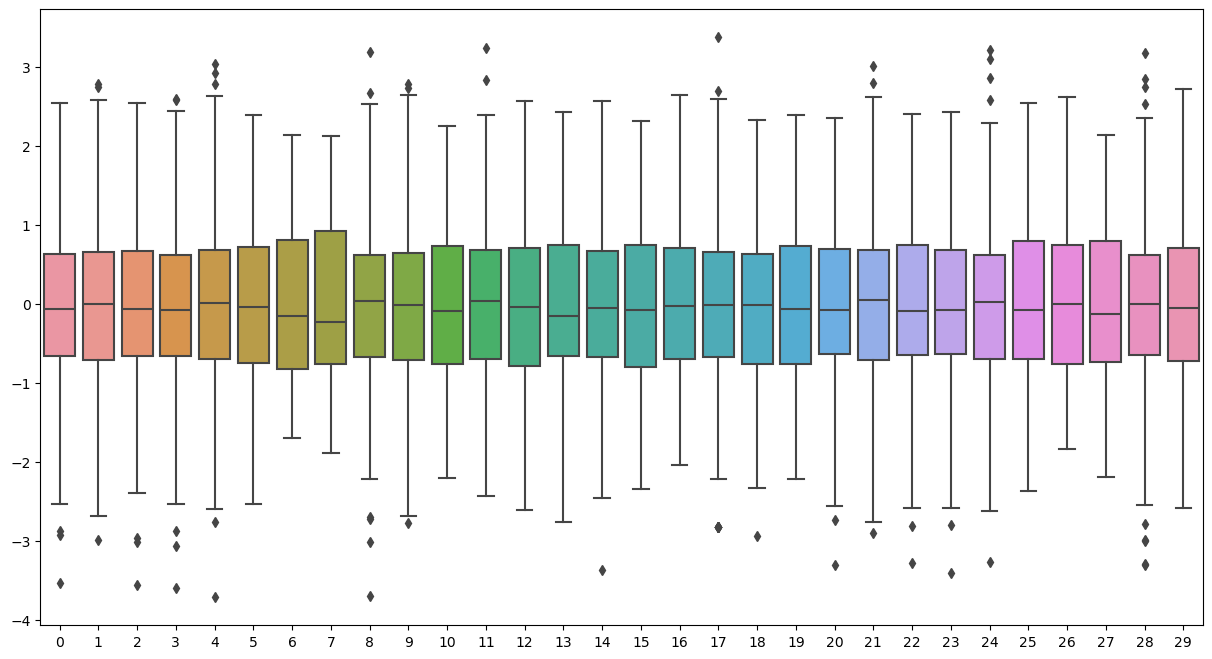

In [30]:
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=X_train, ax=ax)

##### 6.1.2.2 Using Statistical Methods

<b>Replacing Outliers with Upper/Lower Bound Using IQR:</b>

Replacing outliers with upper/lower bounds using IQR involves calculating the interquartile range (IQR) of a numerical column. Outliers are values above Q3 + 1.5 * IQR or below Q1 - 1.5 * IQR. These outliers are then replaced with the nearest boundary (either Q3 + 1.5 * IQR or Q1 - 1.5 * IQR).

In [33]:
for column in X_train.columns:
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    X_train[column] = np.where(X_train[column] > UL, UL, X_train[column])
    X_train[column] = np.where(X_train[column] < LL, LL, X_train[column])

<Axes: >

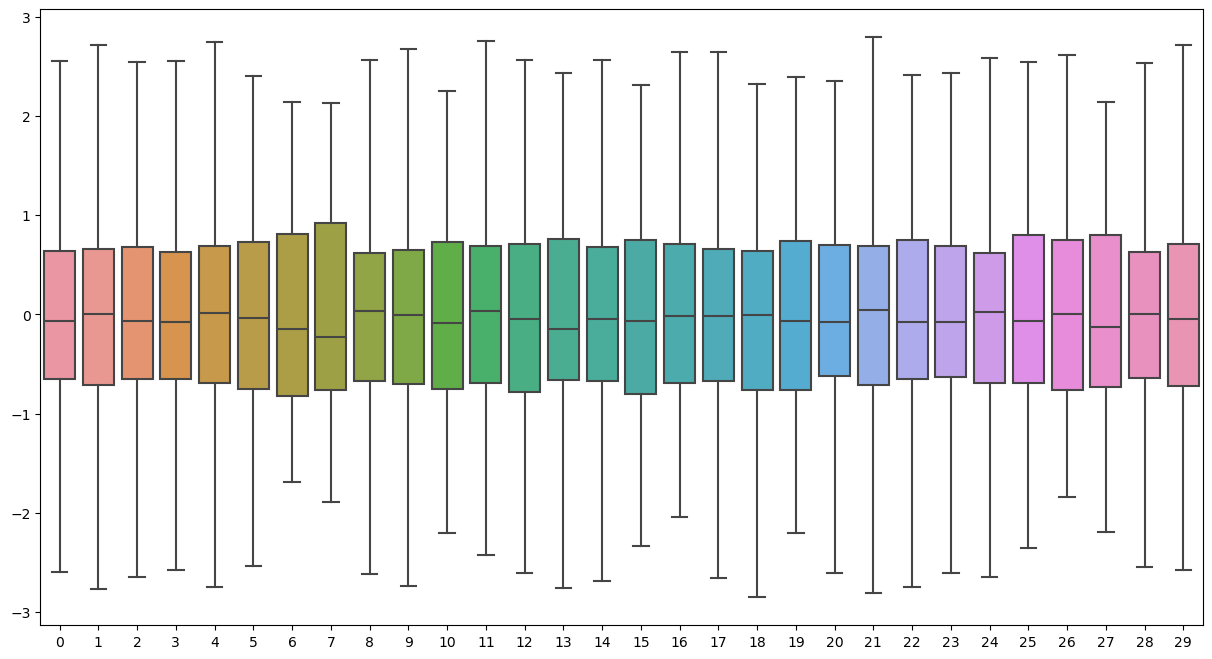

In [34]:
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=X_train, ax=ax)

#### 6.1.3 Handling Skewness
- If skewness is less than -1 or greater than +1, the distribution is highly skewed.
- If skewness is between -1 and -1/2 or between +1/2 and +1, the distribution is moderately skewed.
- If skewness is between -1/2 and +1/2, the distribution is approximately skewed.

##### 6.1.3.1 Visualization using Histogram

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>],
       [<Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: title={'center': '24'}>],
       [<Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>,
        <Axes

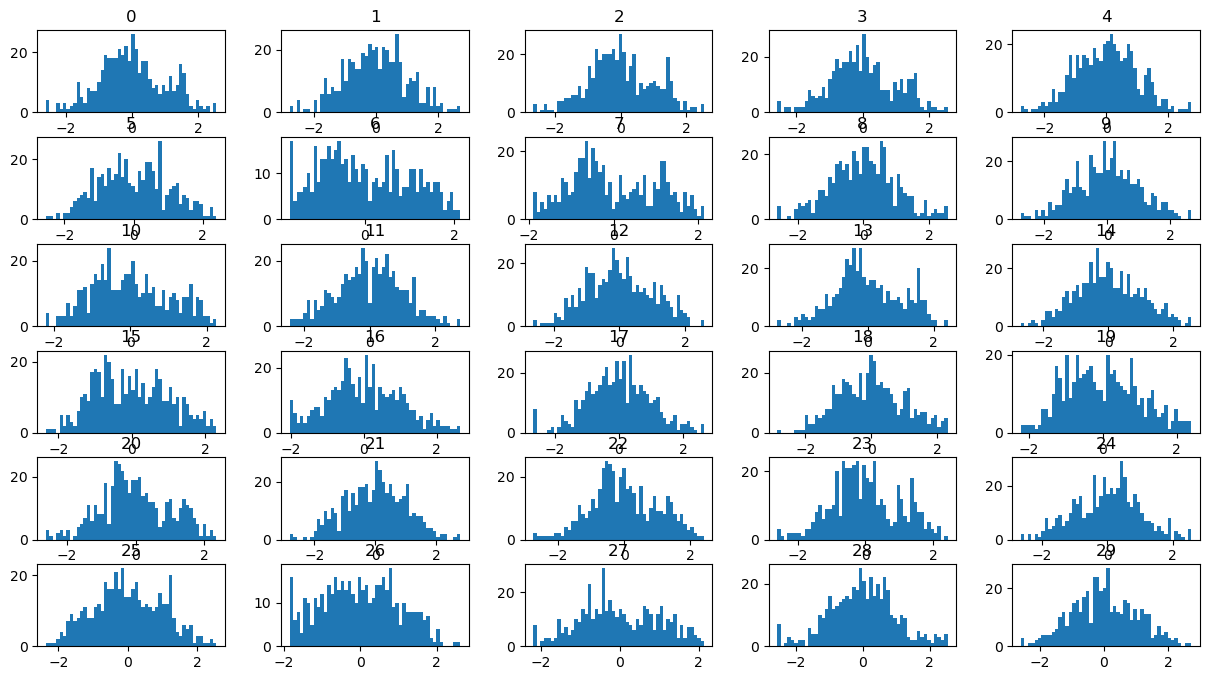

In [37]:
X_train.hist(figsize=(15,8),bins=50,grid=False)

##### 6.1.3.2 Calculating Skewness using `skew`

In [39]:
from scipy.stats import skew
# Calculate skewness
skewness = X_train.apply(skew)
print("Skewness of Features:\n", skewness)

Skewness of Features:
 0     0.087682
1     0.005904
2     0.090289
3     0.095500
4     0.033323
5     0.091237
6     0.219520
7     0.205440
8     0.041502
9     0.022750
10    0.221935
11   -0.018462
12    0.086949
13    0.088883
14    0.114118
15    0.199699
16    0.147150
17   -0.018198
18    0.143656
19    0.241724
20    0.079428
21   -0.009305
22    0.063887
23    0.080657
24   -0.043845
25    0.081975
26    0.076782
27    0.054365
28    0.023402
29    0.072340
dtype: float64


In [40]:
# Identify moderately skewed columns
moderately_skewed_columns = skewness[(skewness >= 0.5) | (skewness <= -0.5)].index
print("Moderately skewed features:\n", moderately_skewed_columns)

Moderately skewed features:
 Index([], dtype='int64')


#### 6.1.4 Handling Multicollinearity

1. Multicollinearity occurs when two or more predictor variables in regression model are highly correlated with each other.
2. The VIF quantifies how much the variance of the coefficient estimates are inflated due to multicollinearity.
##### VIF= $ \frac{1}{1 - R_{i}^2} $
3. A thumb rule for interpreting the variance inflation factor:
- 1 = not correlated
- Between 1 and 5 = moderately correlated
- Greater than 5 = highy correlated

##### 6.1.4.1 Correlation Plot

          0         1         2         3         4         5         6   \
0   1.000000  0.297736  0.998123  0.999636  0.136455  0.486342  0.639417   
1   0.297736  1.000000  0.303333  0.301062 -0.012671  0.246810  0.319915   
2   0.998123  0.303333  1.000000  0.997495  0.171486  0.534191  0.677469   
3   0.999636  0.301062  0.997495  1.000000  0.127269  0.478495  0.637402   
4   0.136455 -0.012671  0.171486  0.127269  1.000000  0.673596  0.505675   
5   0.486342  0.246810  0.534191  0.478495  0.673596  1.000000  0.894717   
6   0.639417  0.319915  0.677469  0.637402  0.505675  0.894717  1.000000   
7   0.767798  0.279473  0.797062  0.764509  0.558546  0.847934  0.930365   
8   0.109624  0.090107  0.139772  0.103291  0.532348  0.555652  0.442768   
9  -0.400410 -0.071567 -0.355635 -0.408563  0.572679  0.491729  0.248014   
10  0.580897  0.353507  0.590840  0.586261  0.332984  0.506724  0.592059   
11 -0.172390  0.462560 -0.163691 -0.169395  0.102773  0.049895  0.067679   
12  0.581271

Text(0.5, 1.0, 'Correlation between features')

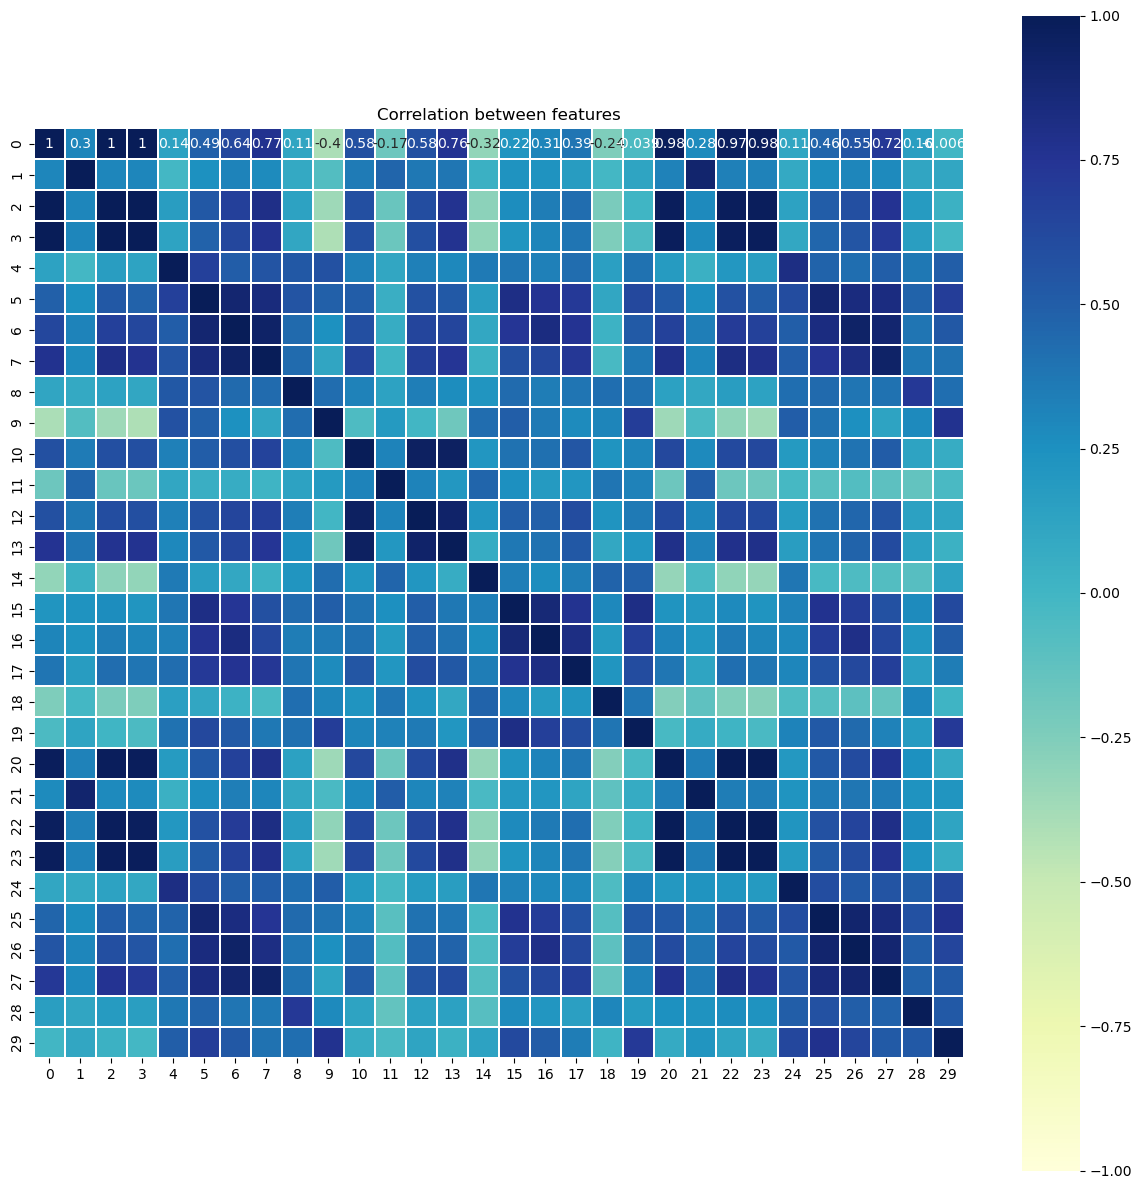

In [43]:
corr=X_train.corr()
print(corr)

plt.figure(figsize=(15,15))
sns.heatmap(corr,
           cmap='YlGnBu',vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True,square=True);
plt.title('Correlation between features')

# 0.0 - 0.2 -> Weak Correlation
# 0.3 - 0.6 -> Moderate Correlation
# 0.7 - 1.0 -> Strong Correlation
# 1 perfect positive
# -1 perfect negative

C:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Strong Correlation between features')

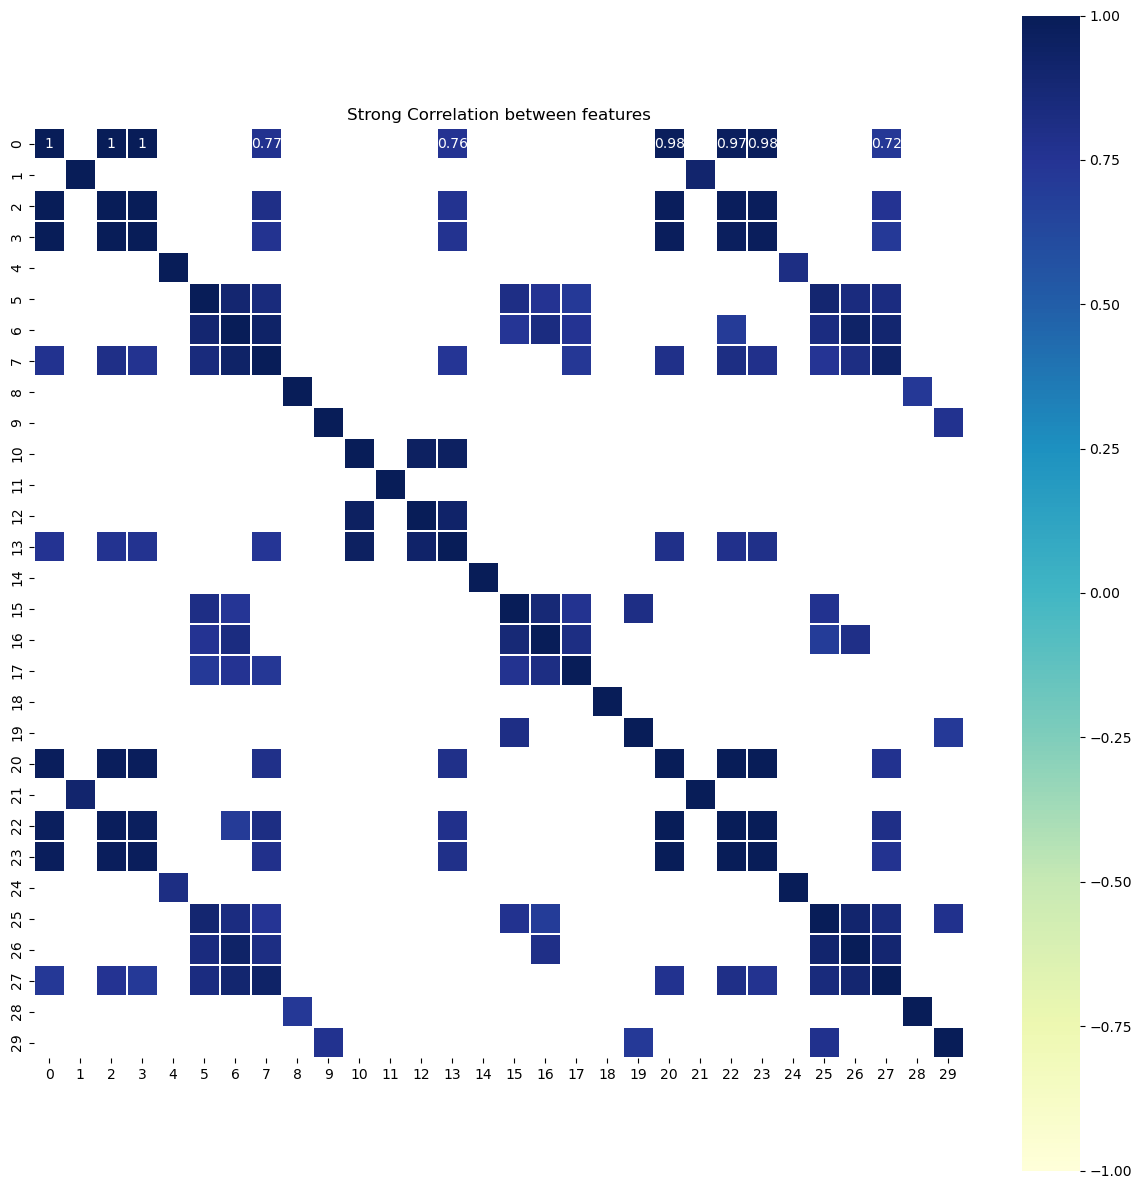

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)],
           cmap='YlGnBu',vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True,square=True);
plt.title('Strong Correlation between features')

##### 6.1.4.2 Variance Inflation Factor(VIF)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
X_train.shape

(455, 30)

In [48]:
vif_df = pd.DataFrame()
vif_df['Features'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 
vif_df

,Features,VIF
0,mean radius,6281.803583
1,mean texture,21.691123
2,mean perimeter,3425.339600
3,mean area,7422.638138
4,mean smoothness,11.953895
5,mean compactness,49.812029
6,mean concavity,82.473713
7,mean concave points,54.799244
8,mean symmetry,6.209364
9,mean fractal dimension,15.261207


##### 6.1.4.3 Handling high VIF using Iterative Method
Handling VIF using an iterative method involves calculating the VIF for each feature, identifying the feature with highest VIF that exceeds a chosen threshold, and removing it from the dataset. This process is repeated until all remaining features have VIF values below the threshold, reducing multicollinearity in the model.

In [50]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature Index"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

    Feature Index          VIF
3               3  7422.638138
0               0  6281.803583
2               2  3425.339600
23             23  2051.983126
20             20  2020.430790
22             22   635.184892
25             25   104.694939
10             10    84.455317
6               6    82.473713
13             13    80.861026
26             26    77.534337
7               7    54.799244
27             27    51.738059
5               5    49.812029
21             21    44.837449
12             12    42.720129
15             15    41.584726
29             29    40.150470
16             16    31.513099
1               1    21.691123
24             24    20.180684
19             19    18.497958
28             28    16.058346
9               9    15.261207
17             17    14.428619
4               4    11.953895
11             11    11.612439
14             14     7.591102
18             18     7.490240
8               8     6.209364


In [51]:
# Iteration 1
X_train = X_train.drop(columns=[3])
vif_df1 = pd.DataFrame()
vif_df1["Feature Index"] = X_train.columns
vif_df1['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df1.sort_values(by="VIF", ascending=False))

    Feature Index          VIF
2               2  2983.100671
0               0  2501.289629
19             20  1280.063090
22             23   961.706068
21             22   635.024011
24             25   102.937808
5               6    80.876819
25             26    77.114917
9              10    73.038214
12             13    66.870913
6               7    54.743995
26             27    50.728578
4               5    45.739662
20             21    44.828499
11             12    42.703554
14             15    40.485413
28             29    39.353275
15             16    30.790522
1               1    21.673794
23             24    20.151022
18             19    18.276405
27             28    16.049726
8               9    14.759500
16             17    14.189903
3               4    11.901153
10             11    11.608297
13             14     7.585540
17             18     7.488477
7               8     6.206515


In [52]:
# Iteration 2
X_train = X_train.drop(columns=[2])
vif_df2 = pd.DataFrame()
vif_df2["Feature Index"] = X_train.columns
vif_df2['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df2.sort_values(by="VIF", ascending=False))

    Feature Index          VIF
18             20  1170.029596
21             23   944.472314
20             22   510.917139
23             25   102.907397
0               0    92.509544
4               6    79.530594
24             26    76.907295
8              10    72.956785
11             13    66.431971
5               7    54.729943
25             27    50.533747
19             21    44.770693
10             12    40.640635
13             15    40.433288
27             29    39.084692
3               5    39.068286
14             16    30.080277
1               1    21.640742
22             24    19.836213
17             19    18.255444
26             28    15.918668
7               9    14.514186
15             17    14.001053
2               4    11.879062
9              11    11.601507
12             14     7.538074
16             18     7.427503
6               8     6.187288


In [53]:
# Iteration 3
X_train = X_train.drop(columns=[20])
vif_df3 = pd.DataFrame()
vif_df3["Feature Index"] = X_train.columns
vif_df3['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df3.sort_values(by="VIF", ascending=False))

    Feature Index         VIF
20             23  441.039341
19             22  410.706809
22             25  102.482220
0               0   87.551140
4               6   78.611541
23             26   76.730717
11             13   60.652012
5               7   54.607727
8              10   50.484351
24             27   50.295385
18             21   44.759285
13             15   39.997398
26             29   39.048388
3               5   38.968639
10             12   34.584534
14             16   30.061029
1               1   21.640696
21             24   19.835598
17             19   18.238543
25             28   15.917986
7               9   14.485474
15             17   13.880708
2               4   11.877279
9              11   11.601460
12             14    7.531076
16             18    7.409103
6               8    6.181090


In [54]:
# Iteration 4
X_train = X_train.drop(columns=[23])
vif_df4 = pd.DataFrame()
vif_df4["Feature Index"] = X_train.columns
vif_df4['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df4.sort_values(by="VIF", ascending=False))

    Feature Index         VIF
19             22  117.105998
21             25  101.756171
0               0   79.499406
4               6   78.366840
22             26   76.618628
5               7   54.605323
11             13   51.413401
23             27   50.193092
8              10   46.020967
18             21   43.685088
13             15   39.884719
25             29   39.047035
3               5   37.876910
14             16   29.959999
10             12   21.716511
1               1   21.237294
20             24   19.677140
17             19   18.209642
24             28   15.884604
7               9   14.458899
15             17   13.880708
2               4   11.845767
9              11   11.373742
12             14    7.483823
16             18    7.331525
6               8    6.172924


In [55]:
# Iteration 5
X_train = X_train.drop(columns=[22])
vif_df5 = pd.DataFrame()
vif_df5["Feature Index"] = X_train.columns
vif_df5['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df5.sort_values(by="VIF", ascending=False))

    Feature Index         VIF
20             25  100.307746
4               6   78.341877
21             26   76.418864
5               7   54.572546
11             13   49.682057
22             27   49.530993
8              10   44.510907
13             15   39.673174
24             29   39.016822
18             21   38.901277
3               5   37.790365
14             16   29.785982
19             24   19.618266
1               1   18.986807
17             19   18.208860
10             12   16.399373
23             28   15.765152
7               9   14.350599
0               0   14.065706
15             17   13.854329
2               4   11.828794
9              11   10.395475
12             14    7.440082
16             18    7.274094
6               8    6.134915


In [56]:
# Iteration 6
X_train = X_train.drop(columns=[25])
vif_df6 = pd.DataFrame()
vif_df6["Feature Index"] = X_train.columns
vif_df6['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df6.sort_values(by="VIF", ascending=False))

    Feature Index        VIF
4               6  73.468708
20             26  58.787391
5               7  54.567853
11             13  49.681852
21             27  49.161134
8              10  44.224029
18             21  38.401491
23             29  34.888295
14             16  25.749047
3               5  22.344490
19             24  19.278077
1               1  18.749188
17             19  16.698250
10             12  16.110601
22             28  14.720019
0               0  14.021582
7               9  13.874200
15             17  13.760004
13             15  12.233473
2               4  11.556614
9              11  10.234184
12             14   7.379608
16             18   6.937604
6               8   5.845883


In [57]:
# Iteration 7
X_train = X_train.drop(columns=[6])
vif_df7 = pd.DataFrame()
vif_df7["Feature Index"] = X_train.columns
vif_df7['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df7.sort_values(by="VIF", ascending=False))

    Feature Index        VIF
10             13  49.422215
20             27  46.793562
7              10  43.795744
17             21  38.393827
19             26  36.902410
22             29  34.802045
4               7  27.709086
13             16  24.362510
3               5  22.012762
18             24  19.244431
1               1  18.749017
16             19  16.662909
9              12  16.110400
21             28  14.415717
0               0  14.019659
6               9  13.776568
14             17  13.546018
12             15  12.062146
2               4  11.477382
8              11  10.232254
11             14   7.321298
15             18   6.819552
5               8   5.788912


In [58]:
# Iteration 8
X_train = X_train.drop(columns=[13])
vif_df8 = pd.DataFrame()
vif_df8["Feature Index"] = X_train.columns
vif_df8['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df8.sort_values(by="VIF", ascending=False))

    Feature Index        VIF
19             27  46.003234
16             21  38.122817
18             26  36.165457
21             29  34.614580
4               7  27.618416
12             16  24.054634
3               5  22.012759
17             24  19.225290
1               1  18.647499
15             19  16.567013
9              12  16.030802
7              10  15.257631
20             28  14.338541
6               9  13.564385
13             17  13.278084
11             15  12.038065
2               4  11.391970
8              11  10.223335
0               0   9.353856
10             14   7.319175
14             18   6.811239
5               8   5.772144


In [59]:
# Iteration 9
X_train = X_train.drop(columns=[27])
vif_df9 = pd.DataFrame()
vif_df9["Feature Index"] = X_train.columns
vif_df9['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df9.sort_values(by="VIF", ascending=False))

    Feature Index        VIF
16             21  36.445116
20             29  34.544549
18             26  27.217697
3               5  21.970450
4               7  20.927709
12             16  19.590398
17             24  18.608570
1               1  17.969175
15             19  16.521947
9              12  15.990483
7              10  15.203452
19             28  14.306489
6               9  13.559083
11             15  11.945812
2               4  11.248635
8              11   9.828211
0               0   8.952214
10             14   7.177281
13             17   7.037247
14             18   6.806593
5               8   5.764068


In [60]:
# Iteration 10
X_train = X_train.drop(columns=[21])
vif_df10 = pd.DataFrame()
vif_df10["Feature Index"] = X_train.columns
vif_df10['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df10.sort_values(by="VIF", ascending=False))

    Feature Index        VIF
19             29  32.791085
17             26  27.119564
3               5  21.927849
4               7  20.770504
12             16  19.358701
16             24  17.490504
9              12  15.910777
15             19  15.785851
7              10  15.001297
6               9  13.059541
18             28  12.042648
11             15  11.877762
2               4  10.792180
0               0   8.949967
13             17   6.977452
10             14   6.893450
14             18   6.058616
5               8   5.138565
8              11   2.676078
1               1   2.066132


In [61]:
# Iteration 11
X_train = X_train.drop(columns=[29])
vif_df11 = pd.DataFrame()
vif_df11["Feature Index"] = X_train.columns
vif_df11['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df11.sort_values(by="VIF", ascending=False))

    Feature Index        VIF
17             26  24.502503
3               5  21.909997
4               7  20.711230
12             16  17.482592
9              12  15.909386
7              10  15.000061
16             24  14.867061
11             15  11.852400
18             28   9.493431
2               4   9.425861
0               0   8.926534
13             17   6.969779
6               9   6.792019
10             14   6.196583
15             19   5.369286
14             18   4.940181
5               8   4.536073
8              11   2.624220
1               1   2.052445


In [62]:
# Iteration 12
X_train = X_train.drop(columns=[26])
vif_df12 = pd.DataFrame()
vif_df12["Feature Index"] = X_train.columns
vif_df12['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df12.sort_values(by="VIF", ascending=False))

    Feature Index        VIF
3               5  21.780603
4               7  16.136431
9              12  15.691738
7              10  14.796720
16             24  13.339242
11             15  11.834465
0               0   8.913506
2               4   8.528310
17             28   8.524326
6               9   6.736428
12             16   6.262715
13             17   5.961165
10             14   5.786299
15             19   5.358368
14             18   4.563636
5               8   4.433359
8              11   2.623835
1               1   2.041008


In [63]:
# Iteration 13
X_train = X_train.drop(columns=[5])
vif_df13 = pd.DataFrame()
vif_df13["Feature Index"] = X_train.columns
vif_df13['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df13.sort_values(by="VIF", ascending=False))

    Feature Index        VIF
8              12  15.473821
6              10  14.703656
3               7  13.752309
15             24  13.334412
16             28   8.503841
0               0   8.501597
2               4   7.792583
10             15   7.599046
11             16   6.223302
12             17   5.843710
9              14   5.733016
5               9   5.383490
14             19   5.274914
13             18   4.546130
4               8   4.412800
7              11   2.477613
1               1   1.968420


In [64]:
# Iteration 14
X_train = X_train.drop(columns=[12])
vif_df14 = pd.DataFrame()
vif_df14["Feature Index"] = X_train.columns
vif_df14['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df14.sort_values(by="VIF", ascending=False))

    Feature Index        VIF
3               7  13.744536
14             24  13.220736
15             28   8.495661
0               0   8.494840
2               4   7.781990
9              15   7.256734
10             16   6.206651
11             17   5.806390
8              14   5.727790
5               9   5.370923
13             19   5.245231
12             18   4.538753
4               8   4.409944
6              10   2.930978
7              11   2.477560
1               1   1.956898


In [65]:
# Iteration 15
X_train = X_train.drop(columns=[7])
vif_df15 = pd.DataFrame()
vif_df15["Feature Index"] = X_train.columns
vif_df15['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df15.sort_values(by="VIF", ascending=False))

    Feature Index        VIF
13             24  12.567010
14             28   8.492662
2               4   7.693959
8              15   7.255202
9              16   6.120936
7              14   5.603863
4               9   5.249645
12             19   5.234286
11             18   4.537912
10             17   4.526229
0               0   4.449638
3               8   4.386005
5              10   2.820824
6              11   2.468136
1               1   1.955190


In [66]:
# Iteration 16
X_train = X_train.drop(columns=[24])
vif_df16 = pd.DataFrame()
vif_df16["Feature Index"] = X_train.columns
vif_df16['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df16.sort_values(by="VIF", ascending=False))

    Feature Index       VIF
8              15  7.253513
9              16  6.059263
12             19  5.220110
4               9  5.199052
10             17  4.454892
0               0  4.445858
13             28  3.399048
3               8  3.225665
2               4  3.008238
5              10  2.819480
6              11  2.453682
7              14  2.418893
11             18  2.163022
1               1  1.935118


In [67]:
# Iteration 17
X_train = X_train.drop(columns=[15])
vif_df17 = pd.DataFrame()
vif_df17["Feature Index"] = X_train.columns
vif_df17['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df17.sort_values(by="VIF", ascending=False))

    Feature Index       VIF
4               9  5.136181
9              17  4.403646
0               0  4.366218
8              16  4.318073
11             19  4.293141
12             28  3.375150
3               8  3.223216
2               4  2.977325
5              10  2.815917
6              11  2.451678
7              14  2.416715
10             18  2.162233
1               1  1.929365


In [68]:
# Iteration 18
X_train = X_train.drop(columns=[9])
vif_df18 = pd.DataFrame()
vif_df18["Feature Index"] = X_train.columns
vif_df18['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 

print(vif_df18.sort_values(by="VIF", ascending=False))

    Feature Index       VIF
8              17  4.397542
7              16  4.304622
11             28  3.345454
0               0  3.245859
3               8  3.221528
4              10  2.773311
10             19  2.700932
5              11  2.442511
6              14  2.359029
9              18  2.155750
2               4  1.936057
1               1  1.918149


Text(0.5, 1.0, 'Correlation between features')

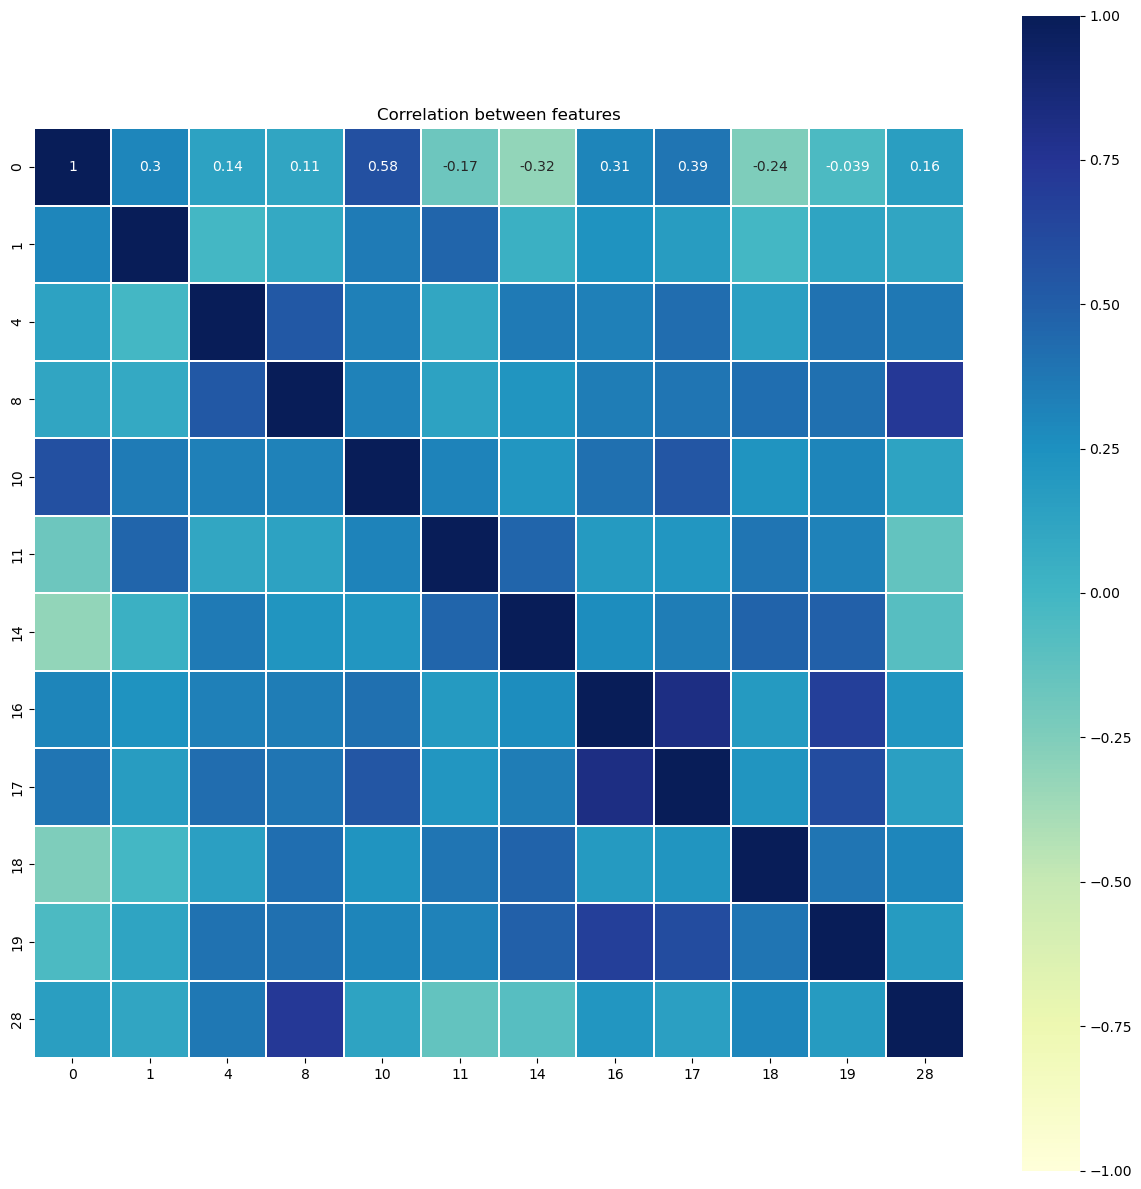

In [69]:
#Correlation Plot after Handling Multicollinearity
corr=X_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,
           cmap='YlGnBu',vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True,square=True);
plt.title('Correlation between features')

### 6.2 Target Variable

In [71]:
# Converting to Pandas DataFrame
y_train = pd.DataFrame(y_train)

In [72]:
y_train.head()

,target
338,1
427,1
406,1
96,1
490,1


C:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

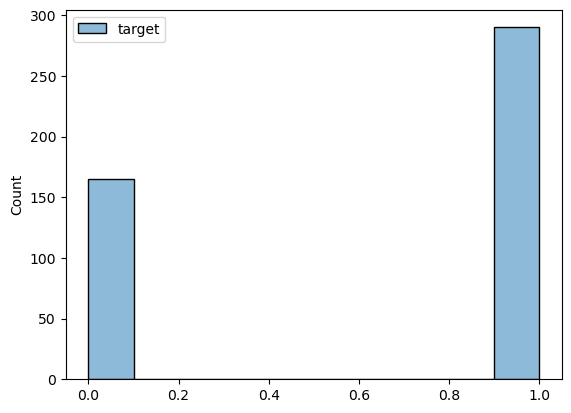

In [73]:
# Visualizing the target variable
sns.histplot(y_train)

### 6.3 Test Data Transformation

#### 6.3.1 Yeo-Johnson Power Transformation

In [76]:
X_test = pt1.transform(X_test)

In [77]:
# Converting to Pandas DataFrame
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.025821,0.422202,0.062197,-0.014148,1.034996,1.016451,1.016507,1.071573,1.137239,1.498492,...,0.299851,0.738585,0.460434,0.341624,1.107084,1.061356,1.246242,1.332346,1.169368,1.528220
1,-0.088772,1.396012,-0.157554,-0.088329,-0.591517,-1.210578,-0.877173,-0.762389,-0.671423,-1.158712,...,-0.214077,1.360924,-0.317062,-0.202016,-0.094464,-1.177990,-0.592427,-0.830112,-0.752436,-1.050285
2,0.169841,-0.829146,0.105894,0.167613,-1.251153,-1.082134,-1.059093,-0.504658,-0.803314,-1.154047,...,-0.061388,-1.052442,-0.103334,-0.035372,-1.356381,-1.237060,-1.218288,-0.411912,-1.505447,-1.129060
3,0.241827,-0.143551,0.179151,0.256959,-2.455360,-1.205369,-0.954680,-1.100655,-0.602282,-1.154047,...,0.257526,0.055580,0.228066,0.288590,-1.847550,-0.027937,-0.465770,-0.537476,-0.343254,-0.259261
4,-0.149786,-0.080196,-0.233900,-0.146204,-0.443515,-1.745134,-0.931762,-0.392731,-1.371406,-0.553420,...,-0.532114,-0.370406,-0.630902,-0.507005,-1.704305,-2.041453,-1.350132,-1.031042,-1.918696,-1.722793


#### 6.3.2 Handling Outliers 

<b>Replacing Outliers with Upper/Lower Bound Using IQR:</b>

Replacing outliers with upper/lower bounds using IQR involves calculating the interquartile range (IQR) of a numerical column. Outliers are values above Q3 + 1.5 * IQR or below Q1 - 1.5 * IQR. These outliers are then replaced with the nearest boundary (either Q3 + 1.5 * IQR or Q1 - 1.5 * IQR).

In [80]:
for column in X_test.columns:
    Q1 = X_test[column].quantile(0.25)
    Q3 = X_test[column].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    X_test[column] = np.where(X_test[column] > UL, UL, X_test[column])
    X_test[column] = np.where(X_test[column] < LL, LL, X_test[column])

#### 6.3.3 Handling Skewness
- If skewness is less than -1 or greater than +1, the distribution is highly skewed.
- If skewness is between -1 and -1/2 or between +1/2 and +1, the distribution is moderately skewed.
- If skewness is between -1/2 and +1/2, the distribution is approximately skewed.

In [82]:
from scipy.stats import skew
# Calculate skewness
skewness = X_test.apply(skew)
print("Skewness of Features:\n", skewness)

Skewness of Features:
 0    -0.417992
1    -0.045012
2    -0.384362
3    -0.424301
4     0.156155
5     0.145294
6     0.148800
7     0.052301
8    -0.020451
9     0.039067
10   -0.192491
11    0.337145
12   -0.229363
13   -0.406465
14    0.160062
15    0.074821
16   -0.011387
17   -0.197486
18   -0.061136
19    0.052304
20   -0.414590
21   -0.187946
22   -0.378588
23   -0.441036
24   -0.064089
25    0.124065
26    0.166086
27   -0.135889
28   -0.071270
29    0.034107
dtype: float64


In [83]:
# Identify moderately skewed columns
moderately_skewed_columns = skewness[(skewness >= 0.5) | (skewness <= -0.5)].index
print("Moderately skewed features:\n", moderately_skewed_columns)

Moderately skewed features:
 Index([], dtype='int64')


#### 6.3.4 Handling Multicollinearity

In [85]:
X_test = X_test.drop(columns=[2,3,5,6,7,9,12,13,15,20,21,22,23,24,25,26,27,29])

## 7. Logistic Regression Modelling

### 7.1 Building a Logistic Regression Model

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [89]:
np.ravel(y_train)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [90]:
# Fit the model to the training data
model.fit(X_train,np.ravel(y_train))

LogisticRegression()

In [91]:
#Predictions 
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1])

`y_pred_prob` typically refers to the predicted probabilities outputted by a model in a classification task, especially in the context of logistic regression or other probabilistic classifiers in Python's `sklearn` library. Each row corresponds to a sample, and each column represents the predicted probability for a class (typically, the first column for class 0 and the second for class 1).

In [93]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[9.80026386e-01, 1.99736136e-02],
       [5.32956690e-02, 9.46704331e-01],
       [1.36837334e-03, 9.98631627e-01],
       [1.65638229e-02, 9.83436177e-01],
       [2.10963190e-05, 9.99978904e-01],
       [1.37041701e-02, 9.86295830e-01],
       [1.17934475e-05, 9.99988207e-01],
       [1.17514416e-03, 9.98824856e-01],
       [3.72837761e-06, 9.99996272e-01],
       [8.48549063e-06, 9.99991515e-01],
       [2.05718571e-01, 7.94281429e-01],
       [1.20853062e-01, 8.79146938e-01],
       [2.78158804e-06, 9.99997218e-01],
       [8.14465127e-01, 1.85534873e-01],
       [8.20423904e-01, 1.79576096e-01],
       [8.83558837e-01, 1.16441163e-01],
       [1.36174205e-02, 9.86382580e-01],
       [9.99352720e-01, 6.47279703e-04],
       [9.93162744e-01, 6.83725626e-03],
       [9.99944714e-01, 5.52858472e-05],
       [9.49517233e-01, 5.04827672e-02],
       [9.16547587e-01, 8.34524133e-02],
       [8.89540407e-03, 9.91104596e-01],
       [1.96491497e-03, 9.98035085e-01],
       [8.822214

### 7.2 Model Evaluation

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, RocCurveDisplay, classification_report

#### 7.2.1 Accuracy
- **Definition**: The ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.
- **Formula**: `(TP + TN) / (TP + TN + FP + FN)`
- **Use Case**: Best when the classes are balanced.

In [97]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9473684210526315

#### 7.2.2 Precison
- **Definition**: The ratio of correctly predicted positive instances to the total predicted positives.
- **Formula**: `TP / (TP + FP)`
- **Use Case**: Important when false positives are costly.

In [99]:
precision = precision_score(y_test,y_pred)
precision

0.9692307692307692

#### 7.2.3 Recall
- **Definition**: The ratio of correctly predicted positive instances to the actual positives.
- **Formula**: `TP / (TP + FN)`
- **Use Case**: Crucial when missing a positive case is more costly (e.g., medical diagnoses).

In [101]:
recall = recall_score(y_test,y_pred)
recall

0.9402985074626866

#### 7.2.4 Specificity
- **Definition**: The ratio of correctly predicted negative instances to the actual negatives.
- **Formula**: `TN / (TN + FP)`
- **Use Case**: Used alongside recall to understand classifier performance on negative cases.

In [103]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
specificity = tn/(fp+tn)
specificity

0.9574468085106383

#### 7.2.5 Area Under ROC Curve
- **Definition**: The area under the Receiver Operating Characteristic (ROC) curve, which plots True Positive Rate (Recall) vs. False Positive Rate.
- **Interpretation**:
  - AUC close to 1 indicates a good model.
  - AUC close to 0.5 indicates a poor model.

In [105]:
#Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [106]:
#Compute the Area Under Curve (AUC)
roc_auc = auc(fpr,tpr)
roc_auc

0.9488726579866624

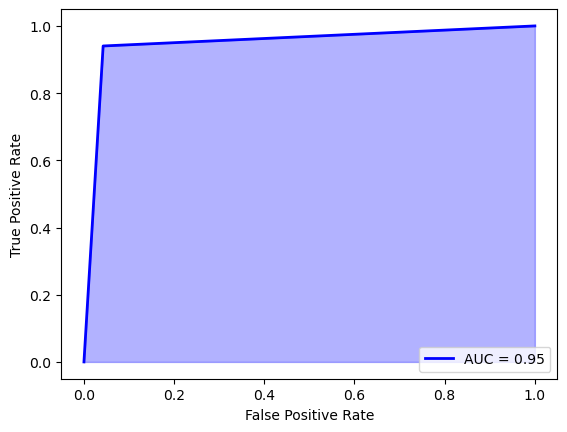

In [107]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(linewidth=2, color='blue')
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')

<b> The model performs very well, showing high accuracy, precision, recall, and specificity, indicating that it correctly identifies both positive and negative cases. The AUC of 0.95 confirms that the model has strong discriminatory power, effectively distinguishing between classes. </b>

#### 7.2.6 Confusion Matrix
- **Definition**: A matrix that summarizes the performance of a classification algorithm by showing the actual vs. predicted instances.
- **Structure**:

  |                | Predicted Positive | Predicted Negative |
  |----------------|--------------------|--------------------|
  | **Actual Positive** | TP                 | FN                 |
  | **Actual Negative** | FP                 | TN                 |

- **Use Case**: Helps in identifying the types of errors the model is making.

In [110]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[45  2]
 [ 4 63]]


In [111]:
pd.crosstab(y_test, y_pred, rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,45,2
1,4,63


Text(0.5, 1.0, 'Confusion Matrix')

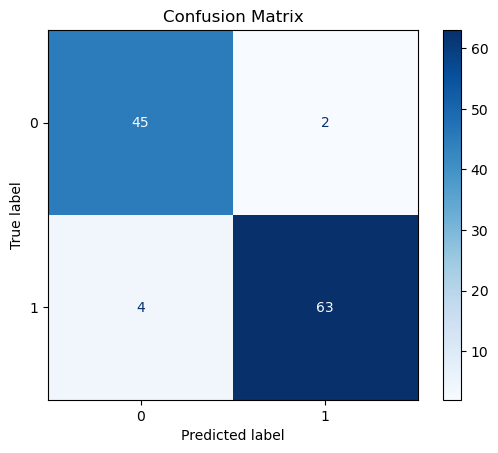

In [112]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

#### 7.2.7 Classification Report
- **Definition**: A summary report that provides precision, recall, F1-score, and support (number of true instances) for each class.
- **Generated By**: `sklearn.metrics.classification_report()`.
- **Use Case**: Comprehensive overview of model performance across all classes.

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        47
           1       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

